梯度下降算法可以让我们从一个随机的起始点 w ，向着梯度始终减小的方向前进，公式如下：  
        $${\omega}={\omega}-\alpha\frac{\partial cost}{\partial\omega}$$  
这里的 cost 为 ：   
$$cost(\omega)=\frac{1}{N}\sum_{n=1}^{N}(\hat{y}_{n}-y_{n})^{2}$$  
可以看到 cost 是所有点的 loss 的求和取平均，但是由于每个点的数据都是单独计算，因此并行计算时可以无需等待，直接并行计算所有点；因此梯度计算变为：   
$$\frac{\partial cost}{\partial\omega}=\frac1N\sum_{n=1}^N2\cdot x_n\cdot(x_n\cdot\omega-y_n)$$

下面给出梯度下降算法的简单实现

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
x_data = [1, 2, 3, 4]
y_data = [2, 4, 6, 8]

w = 1.0         # 假设 w 开始为一随机值

In [83]:
# 定义需要的函数
def forward(x):
    return w * x

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

def cost(xx, yy):
    sum = 0
    for xi, yi in zip(xx, yy):
        sum += loss(xi, yi)
    return sum / len(xx)


In [84]:
# 梯度下降算法
def gradient1(xx, yy):
    sum = 0
    for xi, yi in zip(xx, yy):
        sum += 2 * xi * (forward(xi) - yi)
    return sum / len(xx)

final w is : 1.9999999125232637


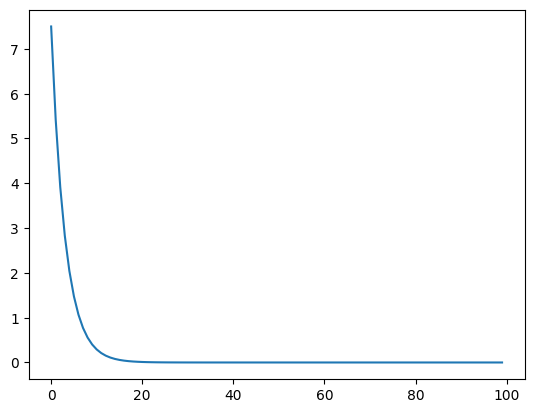

In [85]:
epoch_list = []
cost_list = []
for epoch in range(100):
    epoch_list.append(epoch)
    cost_list.append(cost(x_data, y_data))
    w -= 0.01 * gradient1(x_data, y_data)

print("final w is : " + str(w))
plt.plot(epoch_list, cost_list)
plt.show()

随机梯度下降算法，是为了防止梯度下降算法遇到梯度为 0 的情况，因此并不用所有点的梯度，而是每次只采取一个点，即：  
$\omega=\omega-\alpha\frac{\partial loss}{\partial\omega}$   
梯度计算变为了：   
$\frac{\partial loss_n}{\partial\omega}=2\cdot x_n\cdot(x_n\cdot\omega-y_n)$   
但是这种情况下，要计算这次的 w ，必须要知道上一次计算的 w 值，因此无法进行并行计算，效率较低

下面给出随机梯度下降算法的简单实现

In [86]:
def gradient2(xi, yi):
    return 2 * xi * (forward(xi) - yi)

final w is 1.9999999999999998


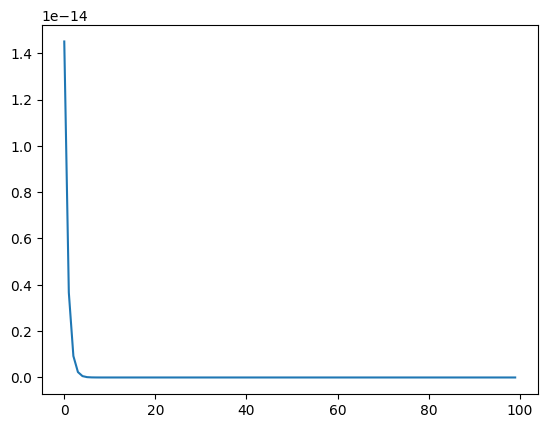

In [87]:
epoch_list = []
loss_list = []

for epoch in range(100):
    epoch_list.append(epoch)
    for xx, yy in zip(x_data, y_data):
        grad = gradient2(xx, yy)
        w -= 0.01 * grad
    loss_list.append(cost(x_data, y_data))

print("final w is " + str(w))
plt.plot(epoch_list, loss_list)
plt.show()

深度学习中，综合了梯度下降算法和随机梯度下降算法的优缺点，采用了一种 Batch 方案，即选取一个 Batch size ，每次选取若干点为一组，每次用一组样本的梯度进行更新。